https://colab.research.google.com/drive/1MhilX3YsOvxzqfBAuMuVPH8J-biMDaFX?usp=sharing

# На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

In [18]:
import pandas as pd

names = ['date', 'sum', 'sum_str', '№1', '№1_str', '№500', '№500_str']
raw_http_df = pd.read_csv('top500.csv', names=names)
raw_http_df.head()

,date,sum,sum_str,№1,№1_str,№500,№500_str
0,1993-5-1,1128.57,06/1993: Sum = 1.1 TFlop/s,59.7,06/1993: #1 = 59.7 GFlop/s,0.42,06/1993: #500 = 0.4 GFlop/s]
1,1993-10-1,1493.35,11/1993: Sum = 1.5 TFlop/s,124.0,11/1993: #1 = 124.0 GFlop/s,0.47,11/1993: #500 = 0.5 GFlop/s]
2,1994-5-1,2317.01,06/1994: Sum = 2.3 TFlop/s,143.4,06/1994: #1 = 143.4 GFlop/s,0.84,06/1994: #500 = 0.8 GFlop/s]
3,1994-10-1,2732.24,11/1994: Sum = 2.7 TFlop/s,170.0,11/1994: #1 = 170.0 GFlop/s,1.16,11/1994: #500 = 1.2 GFlop/s]
4,1995-5-1,3927.00,06/1995: Sum = 3.9 TFlop/s,170.0,06/1995: #1 = 170.0 GFlop/s,1.96,06/1995: #500 = 2.0 GFlop/s]


In [19]:
df = raw_http_df[['date', '№1']]
df.tail()

,date,№1
52,2019-5-1,148600000.0
53,2019-10-1,148600000.0
54,2020-5-1,415530000.0
55,2020-10-1,442010000.0
56,2021-5-1,442010000.0


In [20]:
import numpy as np
from sklearn import linear_model


def get_data(df):
    # x = (raiting list #)
    x = df.index.to_numpy().reshape(-1, 1)
    y = np.log(df['№1'])
    return x, y

def get_x_to_predict(df):
    # x = (raiting list #)
    x = df.index.to_numpy().reshape(-1, 1)
    dates_to_pred = ['2021-10-1', '2022-05-1', '2022-10-1', '2023-05-1',
                     '2023-10-1', '2024-05-1', '2024-10-1', '2025-05-1']
    x_to_pred = np.arange(x[-1:] + 1, x[-1:] + len(dates_to_pred) + 1)
    return x_to_pred.reshape(-1, 1)

    xs, y = get_data(df)
    xp = get_x_to_predict(df)
    model = linear_model.Ridge(fit_intercept=True).fit(xs, y)
    ys = model.predict(xs)
    yp = model.predict(xp)
    print(model.coef_)

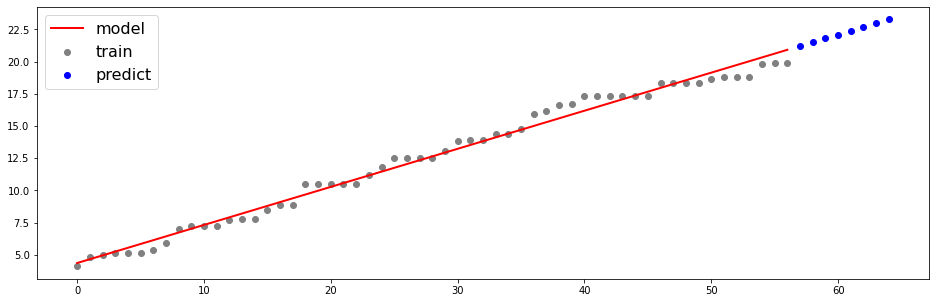

Производительность топ компьютера на 2025 год - [12.80743527] Экзафлопс/с


In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
figsize = (16,5)
legend_fontsize = 16

fig, ax = plt.subplots(figsize=figsize)
ax.plot(ys, linewidth=2, color='red', label='model')
ax.scatter(xs, y, color='grey', label='train')
ax.scatter(xp, yp, color='blue', label='predict')
ax.legend(fontsize=legend_fontsize)
plt.show()

print(f'Производительность топ компьютера на 2025 год - {np.exp(yp[-1:])/10**9} Экзафлопс/с', )

# Оцените, какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

In [22]:

with open('energy_consumption_raw.txt', 'r') as f:
    total_energy = 0
    for line in f.readlines():
        pos = line.find('eff')
        if pos != -1:
            E = float(line[(pos+5):][:-2])
            total_energy += E
    print(f'Электричество постребляемое компьютерами из TOP500 - {round((total_energy/10**9), 6)} ТВт*ч')
    print(f'Это составляет {(total_energy/10**9)/26951*100:0.7f}% от всего производимого электричества на Земле')

Электричество постребляемое компьютерами из TOP500 - 0.000344 ТВт*ч
Это составляет 0.0000013% от всего производимого электричества на Земле
